In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
img = cv2.imread('D:\pythonworkplace\AI_CV\week2\Luffy.png')

In [5]:
def medianBlur(img, kernel, padding_way):
    H, W, L = np.shape(img)
    dtype_img = img.dtype
    B, G, R = cv2.split(img)
    m, n = np.shape(kernel)
    padding_num = int((m - 1) / 2)
    img_nB = np.zeros((H + padding_num * 2, W + padding_num * 2), dtype = dtype_img)
    img_nG = np.zeros((H + padding_num * 2, W + padding_num * 2), dtype = dtype_img)
    img_nR = np.zeros((H + padding_num * 2, W + padding_num * 2), dtype = dtype_img)
    B_blur = np.zeros((H + padding_num * 2, W + padding_num * 2), dtype = dtype_img)
    G_blur = np.zeros((H + padding_num * 2, W + padding_num * 2), dtype = dtype_img)
    R_blur = np.zeros((H + padding_num * 2, W + padding_num * 2), dtype = dtype_img)
    if padding_way == 'REPLICA':
        for i  in range(padding_num - 1):
            img_nB[i, padding_num:-padding_num] = B[0, :]
        img_nB[:padding_num, :padding_num] = B[0, 0]
        img_nB[:padding_num, -padding_num:] = B[0, -1]
        for i in range(1, padding_num):
            img_nB[-i, padding_num:-padding_num] = B[-1, :]
        img_nB[-padding_num:, :padding_num] = B[-1, 0]
        img_nB[-padding_num:, -padding_num:] = B[-1, -1]
        for i in range(padding_num - 1):
            img_nB[padding_num:-padding_num, i] = B[:, 0]
        for i in range(1, padding_num):
            img_nB[padding_num:-padding_num, -i] = B[:, -1]
        img_nB[padding_num:-padding_num, padding_num:-padding_num] = B[:, :]
        
        
        for i  in range(padding_num - 1):
            img_nG[i, padding_num:-padding_num] = G[0, :]
        img_nG[:padding_num, :padding_num] = G[0, 0]
        img_nG[:padding_num, -padding_num:] = G[0, -1]
        for i in range(1, padding_num):
            img_nG[-i, padding_num:-padding_num] = G[-1, :]
        img_nG[-padding_num:, :padding_num] = G[-1, 0]
        img_nG[-padding_num:, -padding_num:] = G[-1, -1]
        for i in range(padding_num - 1):
            img_nG[padding_num:-padding_num, i] = G[:, 0]
        for i in range(1, padding_num):
            img_nG[padding_num:-padding_num, -i] = G[:, -1]
        img_nG[padding_num:-padding_num, padding_num:-padding_num] = G[:, :]
        
        
        
        for i  in range(padding_num - 1):
            img_nR[i, padding_num:-padding_num] = R[0, :]
        img_nR[:padding_num, :padding_num] = R[0, 0]
        img_nR[:padding_num, -padding_num:] = R[0, -1]
        for i in range(1, padding_num):
            img_nR[-i, padding_num:-padding_num] = R[-1, :]
        img_nR[-padding_num:, :padding_num] = R[-1, 0]
        img_nR[-padding_num:, -padding_num:] = R[-1, -1]
        for i in range(padding_num - 1):
            img_nR[padding_num:-padding_num, i] = R[:, 0]
        for i in range(1, padding_num):
            img_nR[padding_num:-padding_num, -i] = R[:, -1]
        img_nR[padding_num:-padding_num, padding_num:-padding_num] = R[:, :]
        
        B_blur[:, :] = img_nB[:, :]
        G_blur[:, :] = img_nG[:, :]
        R_blur[:, :] = img_nR[:, :]
        for x in range(padding_num, W + padding_num - 1):
            for y in range(padding_num, H + padding_num - 1):
                kernel[:, :] = img_nB[y - padding_num : y + padding_num + 1, x - padding_num : x + padding_num + 1]
                B_blur[y, x] = np.sort(kernel.flatten())[int(kernel.size / 2)]
                kernel[:, :] = img_nG[y - padding_num : y + padding_num + 1, x - padding_num : x + padding_num + 1]
                G_blur[y, x] = np.sort(kernel.flatten())[int(kernel.size / 2)]
                kernel[:, :] = img_nR[y - padding_num : y + padding_num + 1, x - padding_num : x + padding_num + 1]
                R_blur[y, x] = np.sort(kernel.flatten())[int(kernel.size / 2)]
        img_merge = cv2.merge((B_blur, G_blur, R_blur))
        return img_merge
    
    elif padding_way == 'ZERO':
        img_nB[:padding_num, :] = 0
        img_nB[-padding_num:, :] = 0
        img_nB[padding_num:-padding_num, :padding_num] = 0
        img_nB[padding_num:-padding_num, -padding_num:] = 0
        img_nB[padding_num:-padding_num, padding_num:-padding_num] = B[:, :]
        
        img_nG[:padding_num, :] = 0
        img_nG[-padding_num:, :] = 0
        img_nG[padding_num:-padding_num, :padding_num] = 0
        img_nG[padding_num:-padding_num, -padding_num:] = 0
        img_nG[padding_num:-padding_num, padding_num:-padding_num] = G[:, :]
        
        img_nR[:padding_num, :] = 0
        img_nR[-padding_num:, :] = 0
        img_nR[padding_num:-padding_num, :padding_num] = 0
        img_nR[padding_num:-padding_num, -padding_num:] = 0
        img_nR[padding_num:-padding_num, padding_num:-padding_num] = R[:, :]
        
        B_blur[:, :] = img_nB[:, :]
        G_blur[:, :] = img_nG[:, :]
        R_blur[:, :] = img_nR[:, :]
        for x in range(padding_num, W + padding_num - 1):
            for y in range(padding_num, H + padding_num - 1):
                kernel[:, :] = img_nB[y - padding_num : y + padding_num + 1, x - padding_num : x + padding_num + 1]
                B_blur[y, x] = np.sort(kernel.flatten())[int(kernel.size / 2)]
                kernel[:, :] = img_nG[y - padding_num : y + padding_num + 1, x - padding_num : x + padding_num + 1]
                G_blur[y, x] = np.sort(kernel.flatten())[int(kernel.size / 2)]
                kernel[:, :] = img_nR[y - padding_num : y + padding_num + 1, x - padding_num : x + padding_num + 1]
                R_blur[y, x] = np.sort(kernel.flatten())[int(kernel.size / 2)]
        img_merge = cv2.merge((B_blur, G_blur, R_blur))
        return img_merge         

In [7]:
kernel = np.zeros((3,3))
img_blur_re = medianBlur(img, kernel, 'REPLICA')
img_blur_ze = medianBlur(img, kernel, 'ZERO')

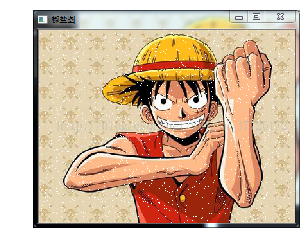

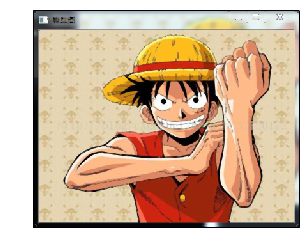

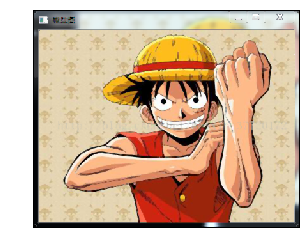

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()
img_blur_re = cv2.cvtColor(img_blur_re, cv2.COLOR_BGR2RGB)
plt.imshow(img_blur_re)
plt.axis('off')
plt.show()
img_blur_ze = cv2.cvtColor(img_blur_ze, cv2.COLOR_BGR2RGB)
plt.imshow(img_blur_ze)
plt.axis('off')
plt.show()

In [9]:
kernel = np.zeros((5,5))
img_blur_re = medianBlur(img, kernel, 'REPLICA')
img_blur_ze = medianBlur(img, kernel, 'ZERO')

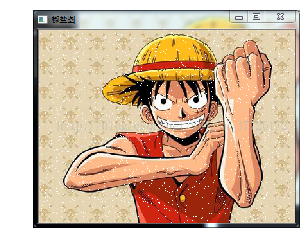

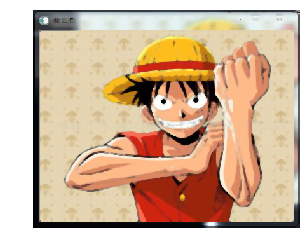

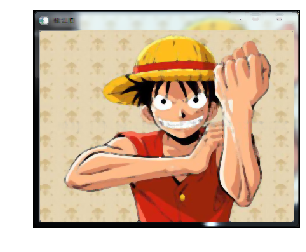

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()
img_blur_re = cv2.cvtColor(img_blur_re, cv2.COLOR_BGR2RGB)
plt.imshow(img_blur_re)
plt.axis('off')
plt.show()
img_blur_ze = cv2.cvtColor(img_blur_ze, cv2.COLOR_BGR2RGB)
plt.imshow(img_blur_ze)
plt.axis('off')
plt.show()

In [12]:
kernel = np.zeros((7,7))
img_blur_re = medianBlur(img, kernel, 'REPLICA')
img_blur_ze = medianBlur(img, kernel, 'ZERO')

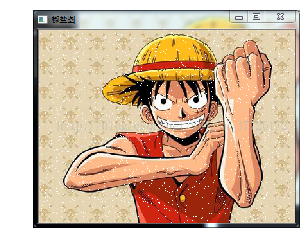

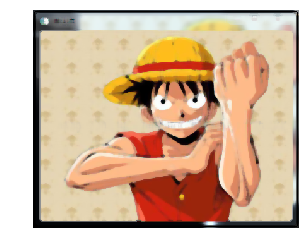

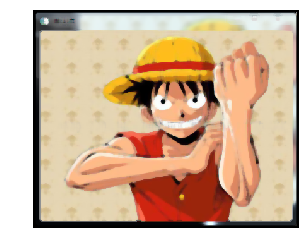

In [14]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()
img_blur_re = cv2.cvtColor(img_blur_re, cv2.COLOR_BGR2RGB)
plt.imshow(img_blur_re)
plt.axis('off')
plt.show()
img_blur_ze = cv2.cvtColor(img_blur_ze, cv2.COLOR_BGR2RGB)
plt.imshow(img_blur_ze)
plt.axis('off')
plt.show()

# 总结

1. 补零扩充以及倒映扩充经过中值滤波得到的平滑效果差不多，都能够使得图像变得更加平滑
2. 卷积核窗口的大小影响平滑效果，窗口越大，平滑效果更明显